In [1]:
## code from aymericdamien/TensorFlow-Examples
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [35]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data',one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [36]:
sample_img, _ = mnist.train.next_batch(1)
print sample_img

[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0

In [31]:
# parameters:
learning_rate = 0.01
training_epochs = 50
batch_size = 256
display_step = 1
examples_to_show = 10

# Network parameters:
n_hidden_1 = 256
n_hidden_2 = 128
n_input = 784   # MNIS

In [7]:
X = tf.placeholder("float", [None, n_input])

In [8]:
weights = {
    'encoder_h1' : tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2' : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1' : tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2' : tf.Variable(tf.random_normal([ n_hidden_1, n_input]))
}


bias = {
    'encoder_b1' : tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2' : tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1' : tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2' : tf.Variable(tf.random_normal([n_input]))
}


In [14]:
# Building the encoder:
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.matmul(x, weights['encoder_h1'])+bias['encoder_b1'])
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),bias['encoder_b2']))
    return layer_2

def decoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.matmul(x, weights['decoder_h1'])+bias['decoder_b1'])
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),bias['decoder_b2']))
    return layer_2

In [15]:
# constructing regular model:
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [19]:
# our predictions:
y_pred = decoder_op
y_true = X   # true value should be itself.

In [25]:
#loss and optimizer:
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)


In [26]:
# innitalizing the variables:
init = tf.initialize_all_variables()

Epoch: 0001 cost= 0.187568009
Epoch: 0002 cost= 0.154400647
Epoch: 0003 cost= 0.139947981
Epoch: 0004 cost= 0.133282945
Epoch: 0005 cost= 0.126932323
Epoch: 0006 cost= 0.117952637
Epoch: 0007 cost= 0.115163080
Epoch: 0008 cost= 0.113581188
Epoch: 0009 cost= 0.112859413
Epoch: 0010 cost= 0.102858968
Epoch: 0011 cost= 0.103744835
Epoch: 0012 cost= 0.102300644
Epoch: 0013 cost= 0.100275099
Epoch: 0014 cost= 0.097714096
Epoch: 0015 cost= 0.096950434
Epoch: 0016 cost= 0.094801530
Epoch: 0017 cost= 0.093150496
Epoch: 0018 cost= 0.092986263
Epoch: 0019 cost= 0.091069996
Epoch: 0020 cost= 0.087503329
Epoch: 0021 cost= 0.088837616
Epoch: 0022 cost= 0.089198560
Epoch: 0023 cost= 0.088710532
Epoch: 0024 cost= 0.087793946
Epoch: 0025 cost= 0.087404855
Epoch: 0026 cost= 0.086607449
Epoch: 0027 cost= 0.087742180
Epoch: 0028 cost= 0.088352419
Epoch: 0029 cost= 0.086098634
Epoch: 0030 cost= 0.087477103
Epoch: 0031 cost= 0.087656043
Epoch: 0032 cost= 0.084523231
Epoch: 0033 cost= 0.083272427
Epoch: 003

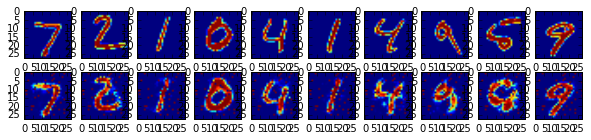

In [32]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    total_batch_num = int(mnist.train.num_examples/batch_size)
    
    # Training cycle
    for epoch in range(training_epochs):
        for ii in range(total_batch_num):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # run optimization op (backprop) and cost op
            _, c = sess.run([optimizer, cost], feed_dict={X : batch_xs})
        # display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch: {:04d} cost= {:.9f}".format(epoch+1, c)
    
    print 'Optimization finished'
    
    # Applying encode and decode over test set:
    encode_decode = sess.run( y_pred, feed_dict = {X : mnist.test.images[:examples_to_show]})
    
    # show original images and reconstruction:
    f, a = plt.subplots(2, 10, figsize=(10,2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
    f.show()
    plt.draw()